<a href="https://colab.research.google.com/github/Harsha7021/Budget-Production/blob/main/SussexBudgetProductions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candidate No: 277232

**Scheme for the new movie**

As the data scientist at Sussex Budget Production, I have witnessed that the last movie produced by our company, which was a comedy thriller with a budget of 500k GBP, failed to make profit in the cinema market.
So, I decided to analyze the all time movie factors (from metadata.csv dataset) through which I can come up with a better plan to make the next movie successful from the 1.5 million GBP the CEO can persuade this year.



---



---



Initially importing the stardard libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


Now importing the dataset and calling it df, which means dataframe.

In [ ]:
df = pd.read_csv('movie_metadata.csv')

**Let us start with some Exploratory Data Analysis and Cleaning**

To display all the columns in the dataset.

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

To get the information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3466 non-null   object 
 1   director_name              3409 non-null   object 
 2   num_critic_for_reviews     3463 non-null   float64
 3   duration                   3470 non-null   float64
 4   director_facebook_likes    3409 non-null   float64
 5   actor_3_facebook_likes     3468 non-null   float64
 6   actor_2_name               3470 non-null   object 
 7   actor_1_facebook_likes     3474 non-null   int64  
 8   gross                      3177 non-null   float64
 9   genres                     3474 non-null   object 
 10  actor_1_name               3474 non-null   object 
 11  movie_title                3474 non-null   object 
 12  num_voted_users            3474 non-null   int64  
 13  cast_total_facebook_likes  3474 non-null   int64

To get the datatypes of different columns in the dataset.

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

To get the description of the dataframe.





In [ ]:
 df.describe()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3463.000000,3470.000000,3409.000000,3468.000000,3474.000000,3.177000e+03,3.474000e+03,3474.000000,3469.000000,3465.000000,3.247000e+03,3404.000000,3469.000000,3473.000000,3396.000000,3473.000000
mean,162.425931,110.924784,823.051628,806.860727,7929.283535,5.925837e+07,1.057771e+05,11877.473230,1.422312,329.738528,5.161459e+07,2003.611340,2119.942346,6.423150,2.225542,9339.803340
std,124.792730,26.333720,3091.855034,1949.509572,15289.805224,7.304608e+07,1.539662e+05,19050.847836,2.079332,413.638148,2.303577e+08,9.327596,4648.437496,1.073256,1.145296,21925.613773
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,6.000000e+00,0.000000,0.000000,1.000000,1.300000e+04,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,72.000000,96.000000,11.000000,213.000000,787.000000,1.374655e+07,1.870350e+04,2040.000000,0.000000,102.000000,1.600000e+07,1999.000000,416.000000,5.800000,1.850000,0.000000
50%,133.000000,107.000000,65.000000,460.000000,2000.000000,3.603791e+07,5.329600e+04,4347.000000,1.000000,202.000000,3.000000e+07,2005.000000,718.000000,6.500000,2.350000,209.000000
75%,220.000000,122.000000,249.000000,716.000000,13000.000000,7.553083e+07,1.284178e+05,16692.750000,2.000000,392.000000,5.800000e+07,2010.000000,989.000000,7.200000,2.350000,11000.000000
max,813.000000,511.000000,22000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


To find out the number of rows and columns in the dataset.

In [ ]:
df.shape

(3474, 28)

To check the missing values.

In [ ]:
df.isna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3471,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3472,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Sum of missing values.

In [ ]:
df.isna().sum()

color                          8
director_name                 65
num_critic_for_reviews        11
duration                       4
director_facebook_likes       65
actor_3_facebook_likes         6
actor_2_name                   4
actor_1_facebook_likes         0
gross                        297
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   6
facenumber_in_poster           5
plot_keywords                 44
movie_imdb_link                0
num_user_for_reviews           9
language                       5
country                        5
content_rating                84
budget                       227
title_year                    70
actor_2_facebook_likes         5
imdb_score                     1
aspect_ratio                  78
movie_facebook_likes           1
dtype: int64

Getting rid of null values.

In [ ]:
df = df.dropna(axis=0)


Modified dataframe:

In [ ]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,Color,Marc Webb,331.0,95.0,464.0,11000.0,Chloë Grace Moretz,23000,32391374.0,Comedy|Drama|Romance,...,494.0,English,USA,PG-13,7500000.0,2009.0,17000.0,7.7,2.35,40000.0
3469,Color,Jane Campion,83.0,121.0,319.0,11.0,Ian Mune,1000,40158000.0,Drama|Music|Romance,...,241.0,English,New Zealand,R,7000000.0,1993.0,18.0,7.6,1.85,0.0
3470,Color,Steven Soderbergh,324.0,110.0,0.0,11000.0,Alex Pettyfer,17000,113709992.0,Comedy|Drama,...,281.0,English,USA,R,7000000.0,2012.0,15000.0,6.1,2.35,54000.0
3471,Color,Jonathan Liebesman,140.0,96.0,474.0,82.0,Emma Caulfield,1000,32131483.0,Horror|Mystery|Thriller,...,369.0,English,USA,PG-13,11000000.0,2003.0,970.0,4.9,2.35,2000.0


Confirming there are no more null values.

In [ ]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Getting rid of the duplicate rows and columns in order to clean the dataset

In [ ]:
df = df.drop_duplicates()
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,Color,Marc Webb,331.0,95.0,464.0,11000.0,Chloë Grace Moretz,23000,32391374.0,Comedy|Drama|Romance,...,494.0,English,USA,PG-13,7500000.0,2009.0,17000.0,7.7,2.35,40000.0
3469,Color,Jane Campion,83.0,121.0,319.0,11.0,Ian Mune,1000,40158000.0,Drama|Music|Romance,...,241.0,English,New Zealand,R,7000000.0,1993.0,18.0,7.6,1.85,0.0
3470,Color,Steven Soderbergh,324.0,110.0,0.0,11000.0,Alex Pettyfer,17000,113709992.0,Comedy|Drama,...,281.0,English,USA,R,7000000.0,2012.0,15000.0,6.1,2.35,54000.0
3471,Color,Jonathan Liebesman,140.0,96.0,474.0,82.0,Emma Caulfield,1000,32131483.0,Horror|Mystery|Thriller,...,369.0,English,USA,PG-13,11000000.0,2003.0,970.0,4.9,2.35,2000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 3472
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2990 non-null   object 
 1   director_name              2990 non-null   object 
 2   num_critic_for_reviews     2990 non-null   float64
 3   duration                   2990 non-null   float64
 4   director_facebook_likes    2990 non-null   float64
 5   actor_3_facebook_likes     2990 non-null   float64
 6   actor_2_name               2990 non-null   object 
 7   actor_1_facebook_likes     2990 non-null   int64  
 8   gross                      2990 non-null   float64
 9   genres                     2990 non-null   object 
 10  actor_1_name               2990 non-null   object 
 11  movie_title                2990 non-null   object 
 12  num_voted_users            2990 non-null   int64  
 13  cast_total_facebook_likes  2990 non-null   int64

Removing unecessary and independent variable columns which will not be used further.

In [ ]:
columns_to_remove = ['num_voted_users', 'num_critic_for_reviews', 'content_rating', 'num_user_for_reviews', 'num_critic_for_reviews' ]

df_cleaned = df.drop(columns=columns_to_remove, axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 3472
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      2990 non-null   object 
 1   director_name              2990 non-null   object 
 2   num_critic_for_reviews     2990 non-null   float64
 3   duration                   2990 non-null   float64
 4   director_facebook_likes    2990 non-null   float64
 5   actor_3_facebook_likes     2990 non-null   float64
 6   actor_2_name               2990 non-null   object 
 7   actor_1_facebook_likes     2990 non-null   int64  
 8   gross                      2990 non-null   float64
 9   genres                     2990 non-null   object 
 10  actor_1_name               2990 non-null   object 
 11  movie_title                2990 non-null   object 
 12  num_voted_users            2990 non-null   int64  
 13  cast_total_facebook_likes  2990 non-null   int64

Heat map of some of the dependent variables

<ipython-input-371-28d5441e6873>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'pearson'), annot=True, linewidths=.5, ax=ax)


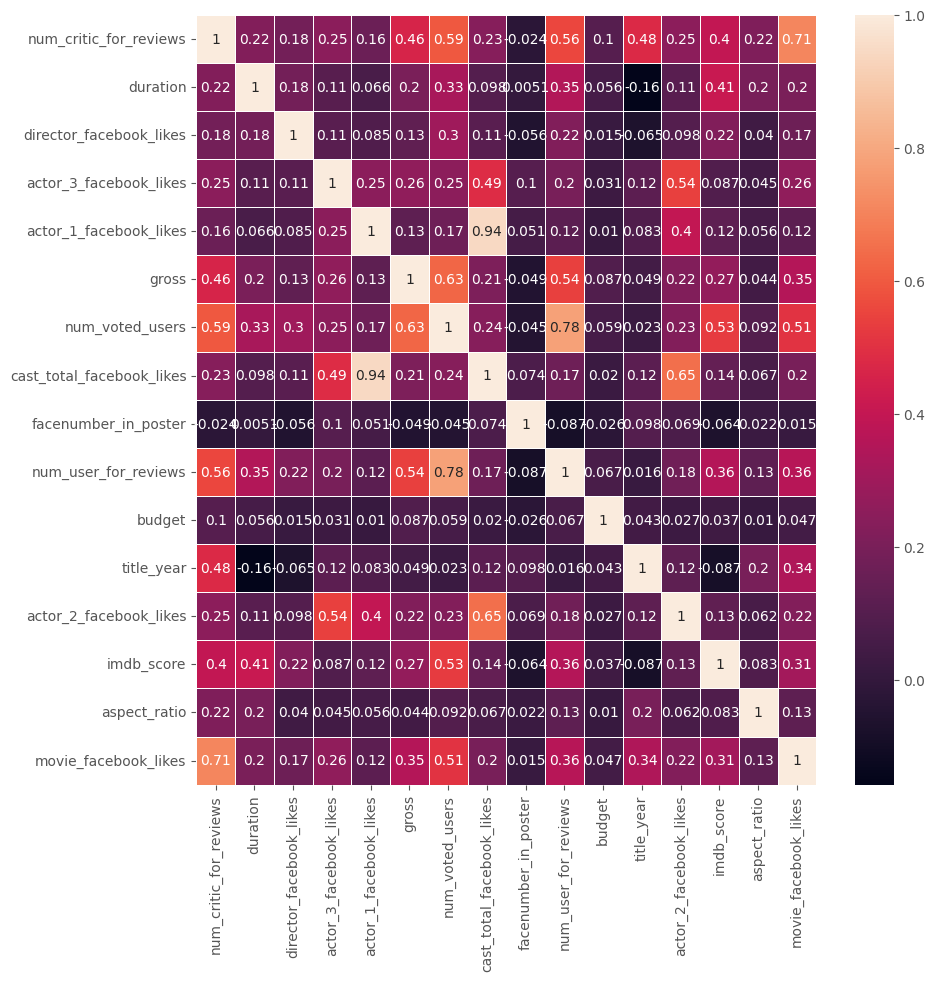

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(method = 'pearson'), annot=True, linewidths=.5, ax=ax)
plt.show()

Top 10 most number of movies released in respective years.

Text(0.5, 1.0, 'Top 10 Title Years with Different Colors')

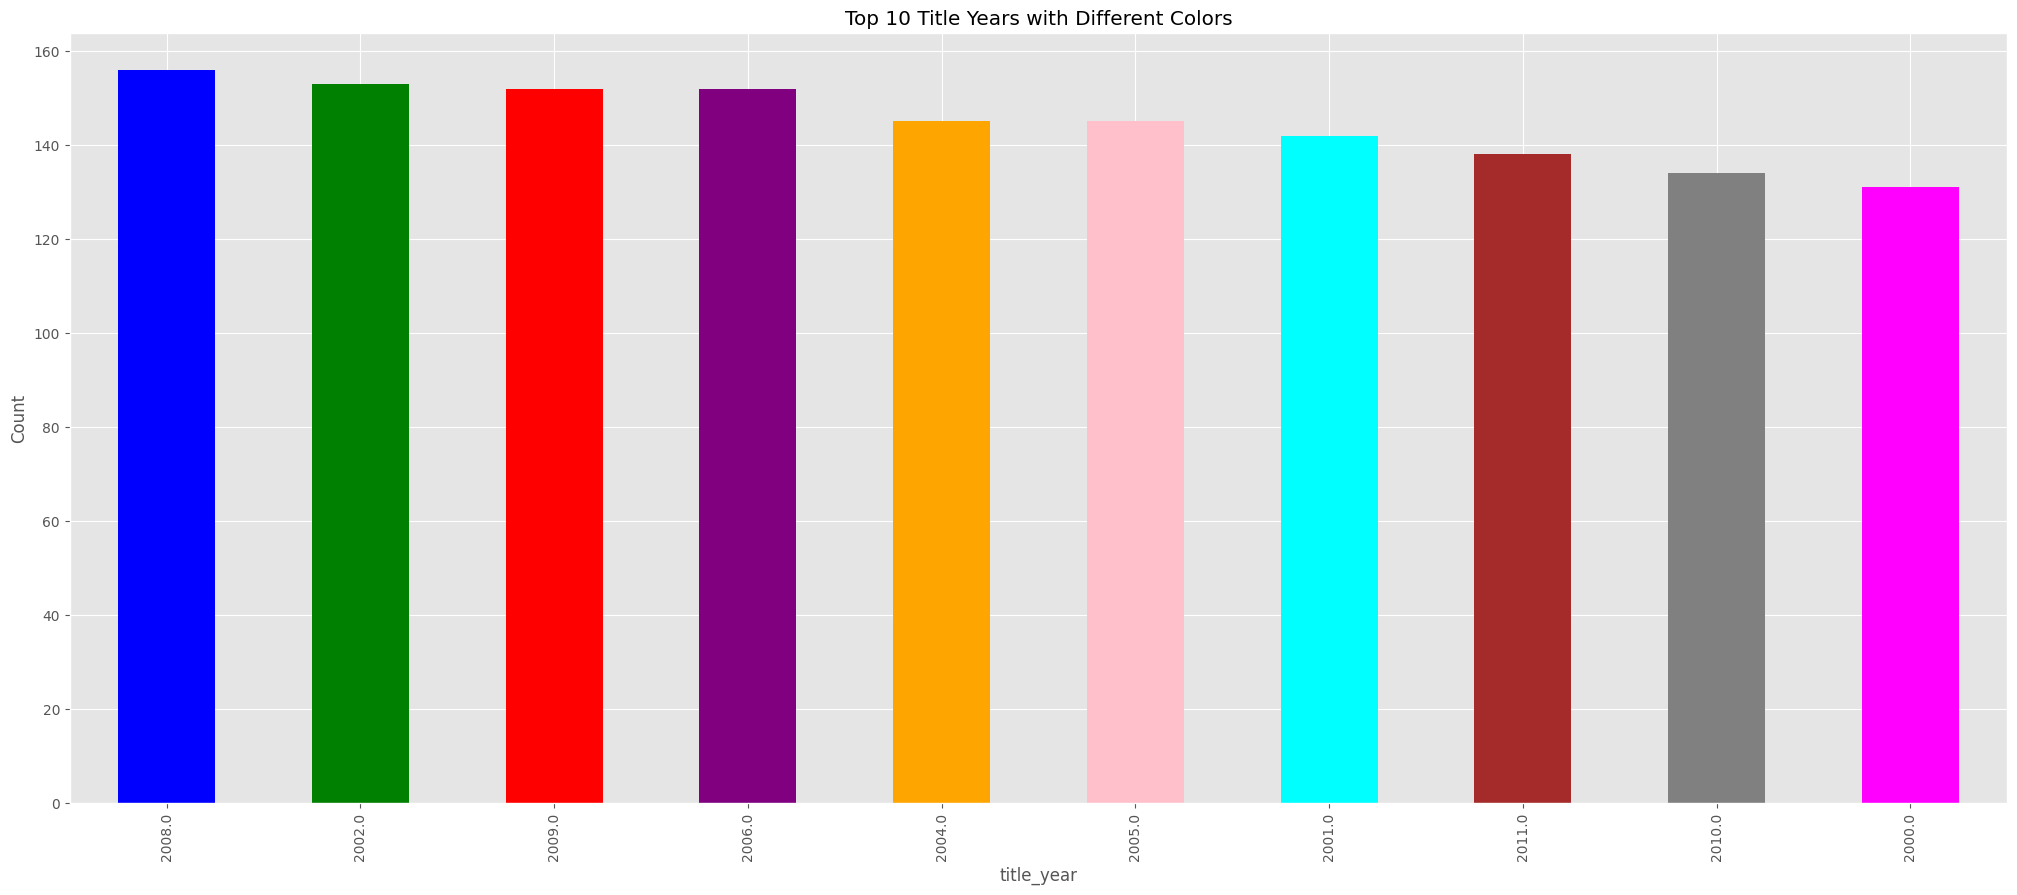

In [ ]:


colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'gray', 'magenta']

df['title_year'].value_counts().head(10).plot.bar(figsize=(25,10), color = colors)

plt.xlabel('title_year')
plt.ylabel('Count')
plt.title('Top 10 Title Years with Different Colors')


Most IMDB scores of several movies.

Text(0.5, 1.0, 'IMDB SCORES')

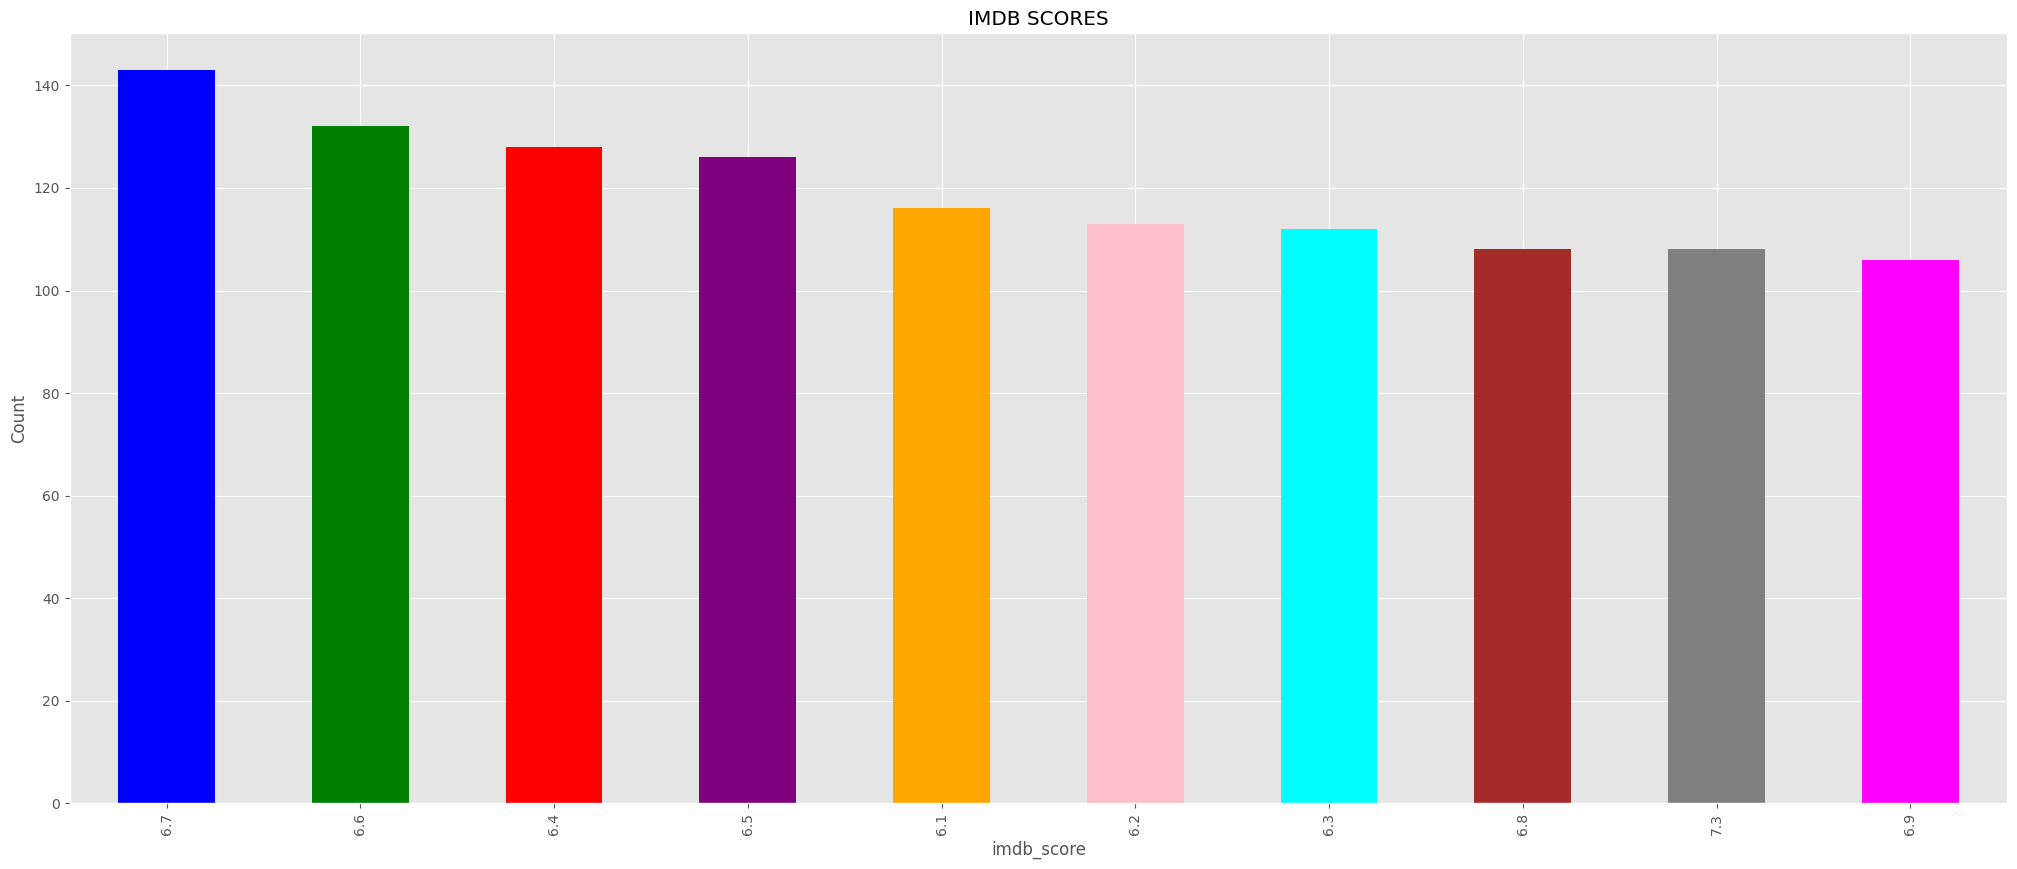

In [ ]:

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan', 'brown', 'gray', 'magenta']

df['imdb_score'].value_counts().head(10).plot.bar(figsize=(25,10), color = colors)

plt.xlabel('imdb_score')
plt.ylabel('Count')
plt.title('IMDB SCORES')

Relational graph between budget and IMDB scores, we shall get the conclusions further down after testing the hypothesis.

<Axes: title={'center': 'budget'}, xlabel='imdb_score'>

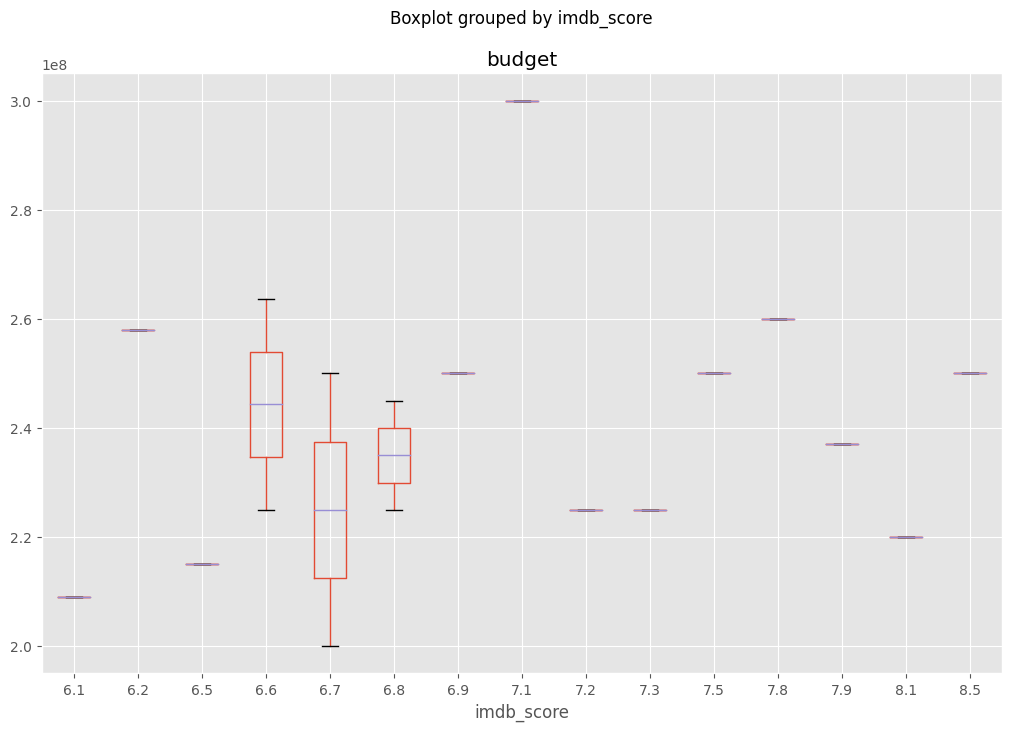

In [ ]:
df.head(20).boxplot(column='budget', by='imdb_score',figsize=(12,8))

Relational graph between gross and IMDB scores

<Axes: title={'center': 'gross'}, xlabel='imdb_score'>

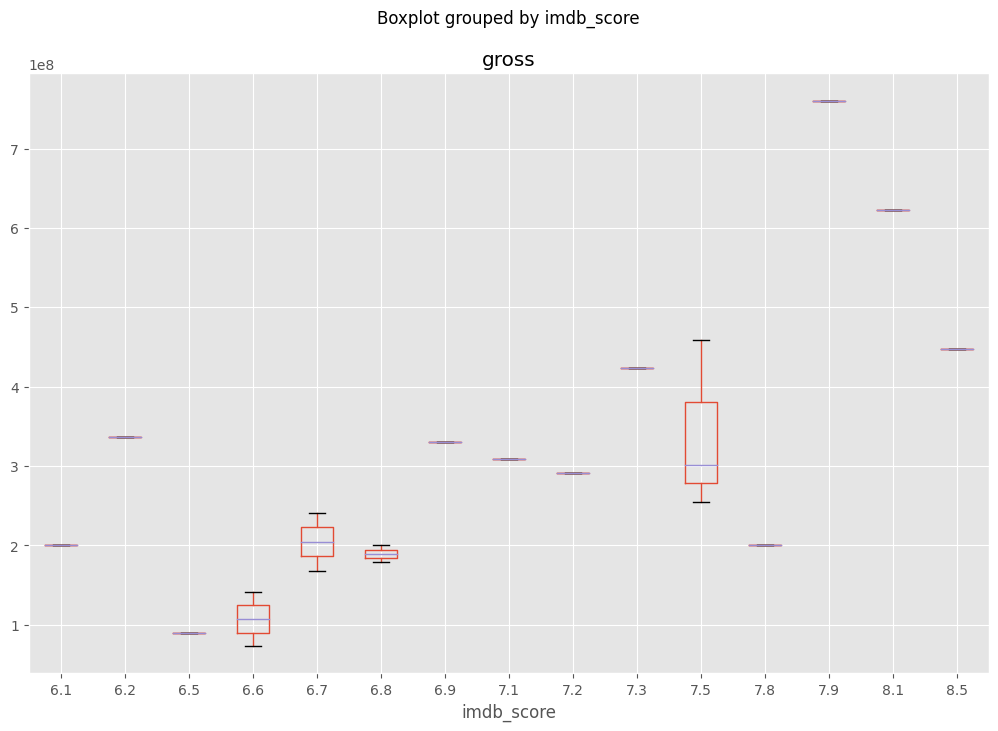

In [ ]:
df.head(20).boxplot(column='gross', by='imdb_score',figsize=(12,8))

Relational graph between budget and IMDB gross, we shall get the conclusions further down after testing the hypothesis.

<Axes: title={'center': 'gross'}, xlabel='budget'>

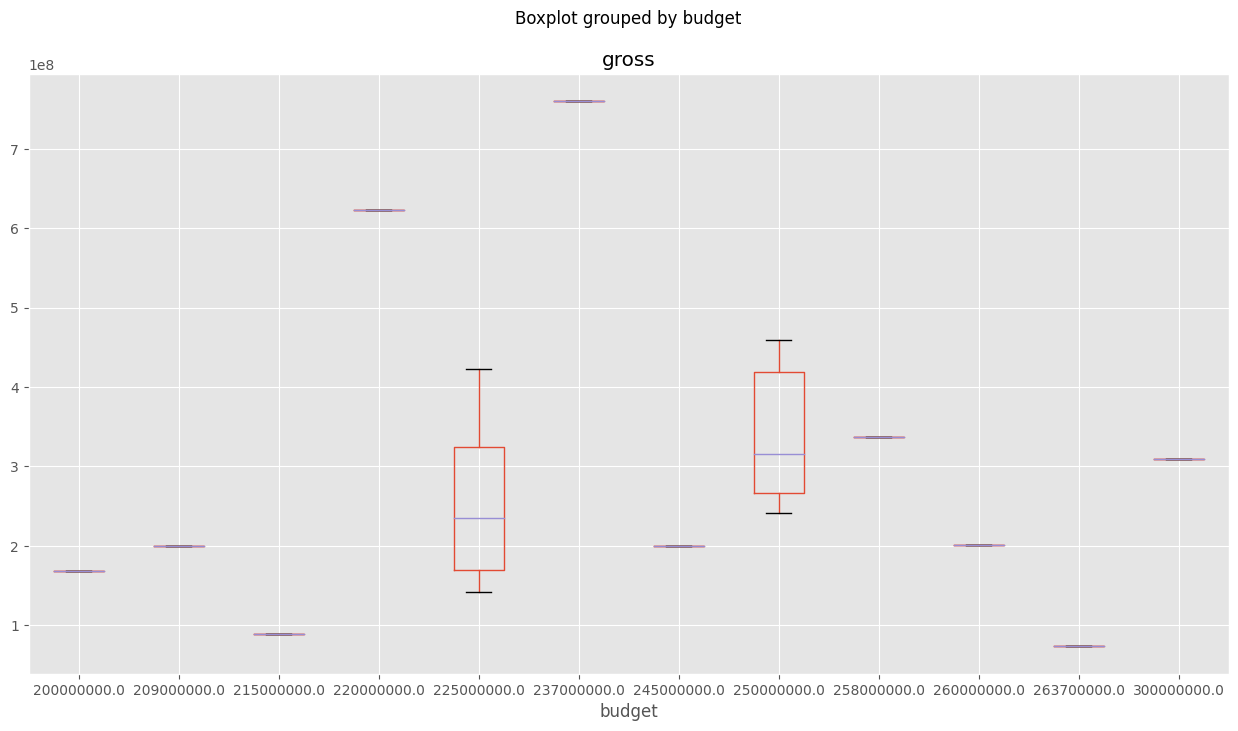

In [ ]:
df.head(20).boxplot(column='gross', by='budget',figsize=(15,8))

Displaying the co relation among the columns

In [ ]:
df.corr()

<ipython-input-377-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.222768,0.184748,0.245806,0.162141,0.457951,0.594935,0.233019,-0.023899,0.556480,0.101214,0.476686,0.250551,0.396762,0.217779,0.708780
duration,0.222768,1.000000,0.182511,0.106911,0.066262,0.203600,0.325701,0.098280,0.005090,0.352652,0.055603,-0.157479,0.110270,0.412336,0.196813,0.203514
director_facebook_likes,0.184748,0.182511,1.000000,0.113356,0.084907,0.128824,0.302846,0.110162,-0.056388,0.218455,0.014781,-0.065493,0.098020,0.222117,0.040043,0.167187
actor_3_facebook_likes,0.245806,0.106911,0.113356,1.000000,0.247992,0.260220,0.252212,0.488355,0.103970,0.198058,0.031294,0.120991,0.540647,0.086998,0.044824,0.259717
actor_1_facebook_likes,0.162141,0.066262,0.084907,0.247992,1.000000,0.126829,0.170939,0.942322,0.051381,0.117559,0.010077,0.083343,0.396362,0.124977,0.056359,0.122640
gross,0.457951,0.203600,0.128824,0.260220,0.126829,1.000000,0.625658,0.208966,-0.049226,0.542730,0.087114,0.048862,0.220542,0.272018,0.044270,0.353943
num_voted_users,0.594935,0.325701,0.302846,0.252212,0.170939,0.625658,1.000000,0.235765,-0.045280,0.781299,0.058968,0.023318,0.225979,0.527398,0.092083,0.507066
cast_total_facebook_likes,0.233019,0.098280,0.110162,0.488355,0.942322,0.208966,0.235765,1.000000,0.073824,0.171995,0.020153,0.117740,0.651728,0.142728,0.067178,0.196913
facenumber_in_poster,-0.023899,0.005090,-0.056388,0.103970,0.051381,-0.049226,-0.045280,0.073824,1.000000,-0.087393,-0.025896,0.097625,0.068935,-0.064238,0.021978,0.015139
num_user_for_reviews,0.556480,0.352652,0.218455,0.198058,0.117559,0.542730,0.781299,0.171995,-0.087393,1.000000,0.067095,0.016062,0.175504,0.357875,0.126380,0.364371


The least IMDB score a movie acquired.

In [ ]:
df['imdb_score'].min()

1.6

The most IMDB score a movie acquired.

In [ ]:
df['imdb_score'].max()

9.3

Mean of all IMDB scores,
we could say that the score 6.5 implies a good movie.

In [ ]:
df['imdb_score'].mean()

6.420802675585285

List of top 10 most successful movies.

In [ ]:
df.nlargest(10,'gross')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000.0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000.0
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000.0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000,533316061.0,Action|Crime|Drama|Thriller,...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000.0
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000,474544677.0,Action|Adventure|Fantasy|Sci-Fi,...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000.0
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000.0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
582,Color,Andrew Adamson,205.0,93.0,80.0,48.0,Jennifer Saunders,692,436471036.0,Adventure|Animation|Comedy|Family|Fantasy|Romance,...,483.0,English,USA,PG,150000000.0,2004.0,309.0,7.2,1.85,0.0


List of top 10 movies with the most budget.

In [ ]:
df.nlargest(10,'budget')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000.0
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607.0
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000.0
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973.0
3423,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6,439162.0,Action|Animation|Sci-Fi,...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0.0
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000,3275443.0,Drama,...,264.0,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659.0
1338,Color,John Woo,160.0,150.0,610.0,478.0,Tony Chiu Wai Leung,755,626809.0,Action|Adventure|Drama|History|War,...,105.0,Mandarin,China,R,5.536320e+08,2008.0,643.0,7.4,2.35,0.0
3311,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,4.000000e+08,2001.0,6.0,6.6,1.85,124.0
1016,Color,Luc Besson,111.0,158.0,0.0,15.0,David Bailie,51,14131298.0,Adventure|Biography|Drama|History|War,...,390.0,English,France,R,3.900000e+08,1999.0,40.0,6.4,2.35,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.35,0.0


Relation between gross and budget.

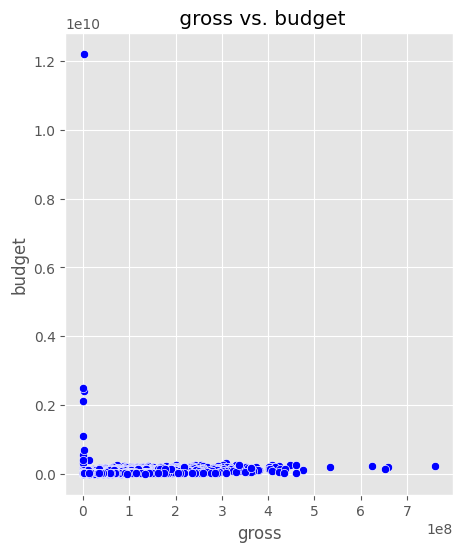

In [ ]:

column_gross = 'gross'
column_budget = 'budget'
df_cleaned = df.dropna(subset=[column_gross, column_budget])
plt.figure(figsize=(5, 6))
sns.scatterplot(data=df_cleaned, x=column_gross, y=column_budget, color='blue')
plt.title(f' {column_gross} vs. {column_budget}')
plt.xlabel(column_gross)
plt.ylabel(column_budget)
plt.grid(True)
plt.show()




**Hypothesis testing** for gross and budget.

In [ ]:

from scipy import stats

df_cleaned = df.dropna(subset=['gross', 'budget'])

budget_threshold = 1500000

high_budget = df_cleaned[df_cleaned['budget'] >= budget_threshold]['gross']
low_budget = df_cleaned[df_cleaned['budget'] < budget_threshold]['gross']

t_statistic, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)

print(f"\nHypothesis Testing for 'gross' and 'budget':")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average 'gross' between high and low budget movies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average 'gross' between high and low budget movies.")



Hypothesis Testing for 'gross' and 'budget':
T-statistic: 4.456916384444778
P-value: 0.009764625525596636
Reject the null hypothesis: There is a significant difference in average 'gross' between high and low budget movies.


From above, we can conclude that budget is a dependent variable. Thus, to make a profitable movie, we need good amount of budget.

Most number of movies directed by directors.

<Axes: >

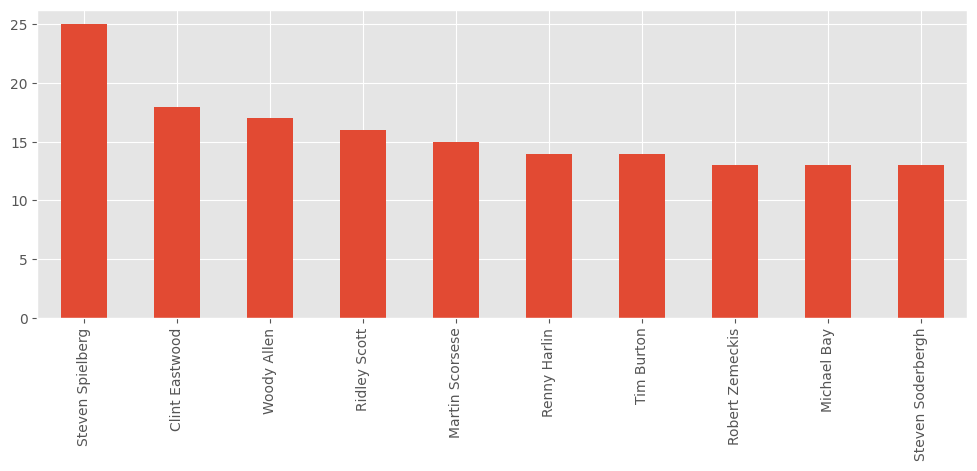

In [ ]:
df.director_name.value_counts().head(10).plot.bar(figsize=(12,4))

Average IMDB scores of top directors from above.

<ipython-input-386-1719ec2f9077>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='imdb_score', y='director_name', data=top_10_directors, ci=None, palette='viridis')


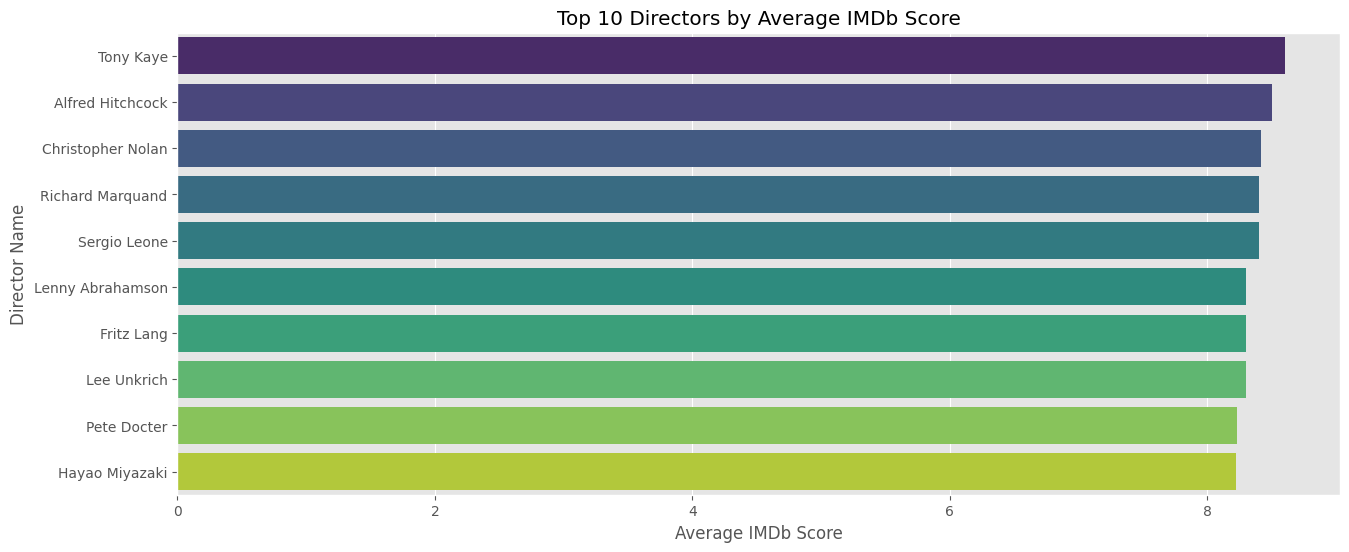

In [ ]:
director_avg_scores = df.groupby('director_name')['imdb_score'].mean().reset_index()

director_avg_scores = director_avg_scores.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_scores.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='imdb_score', y='director_name', data=top_10_directors, ci=None, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Director Name')
plt.show()

Average budget of movies directed by the above directors.

<ipython-input-387-2942243e0e49>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='director_name', y='budget', data=top_10_directors, ci=None, palette='viridis')


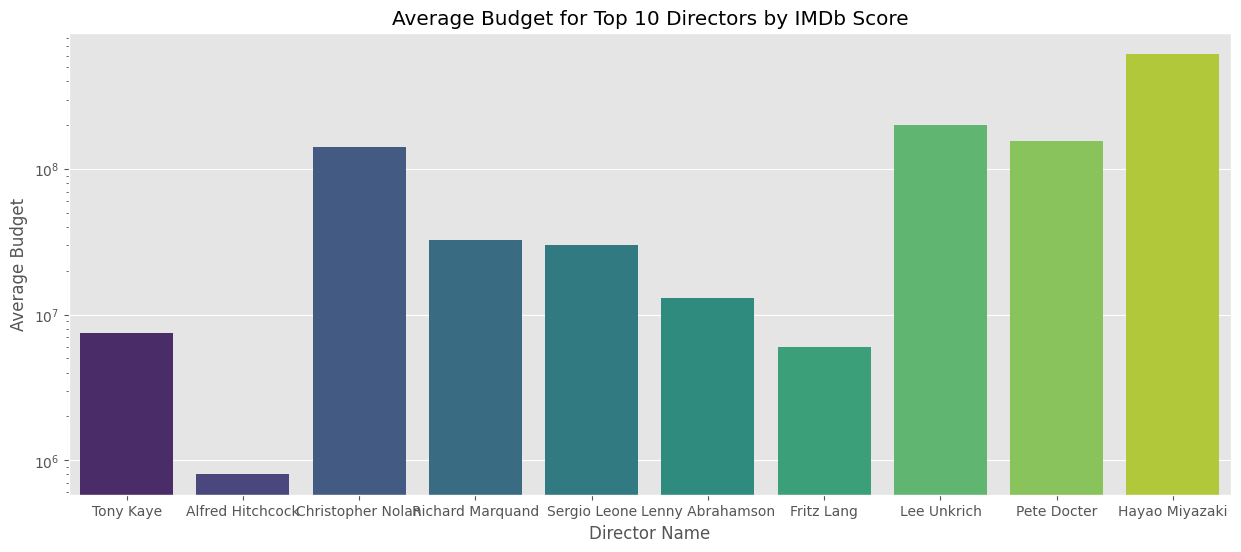

In [ ]:
director_avg_stats = df.groupby('director_name').agg({
    'imdb_score': 'mean',
    'budget': 'mean'
}).reset_index()

director_avg_stats = director_avg_stats.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_stats.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='director_name', y='budget', data=top_10_directors, ci=None, palette='viridis')
plt.title('Average Budget for Top 10 Directors by IMDb Score')
plt.xlabel('Director Name')
plt.ylabel('Average Budget')
plt.yscale('log')  #
plt.show()

Average gross earnings of these directors.

<ipython-input-388-fc8ee224a067>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='director_name', y='gross', data=top_10_directors, ci=None, palette='viridis')


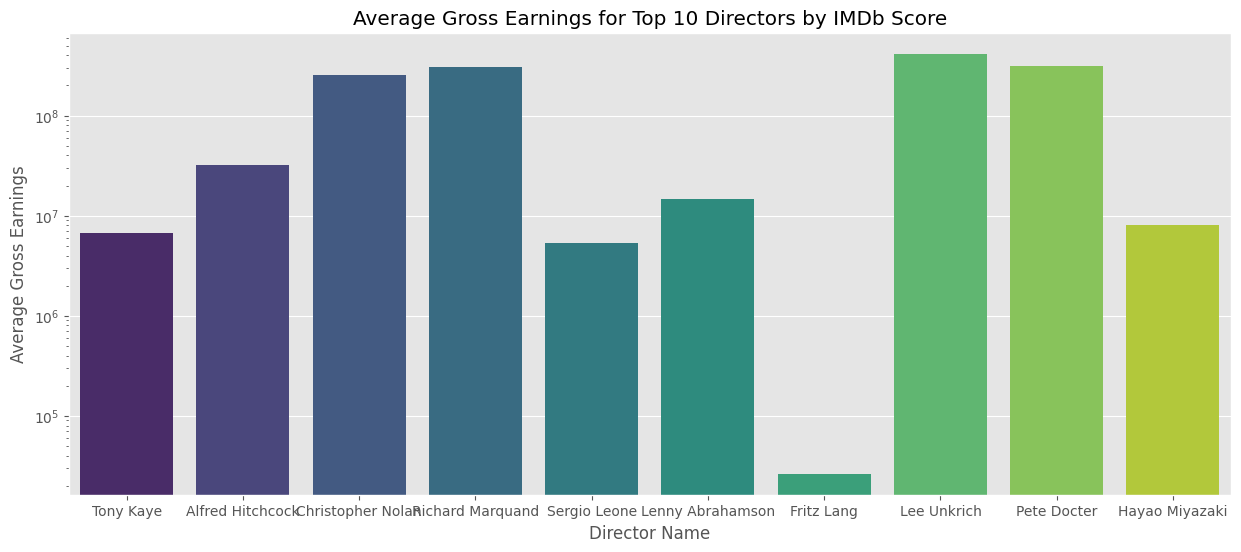

In [ ]:
director_avg_stats = df.groupby('director_name').agg({
    'imdb_score': 'mean',
    'gross': 'mean'
}).reset_index()

director_avg_stats = director_avg_stats.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_stats.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='director_name', y='gross', data=top_10_directors, ci=None, palette='viridis')
plt.title('Average Gross Earnings for Top 10 Directors by IMDb Score')
plt.xlabel('Director Name')
plt.ylabel('Average Gross Earnings')
plt.yscale('log')
plt.show()

All the relations combined.

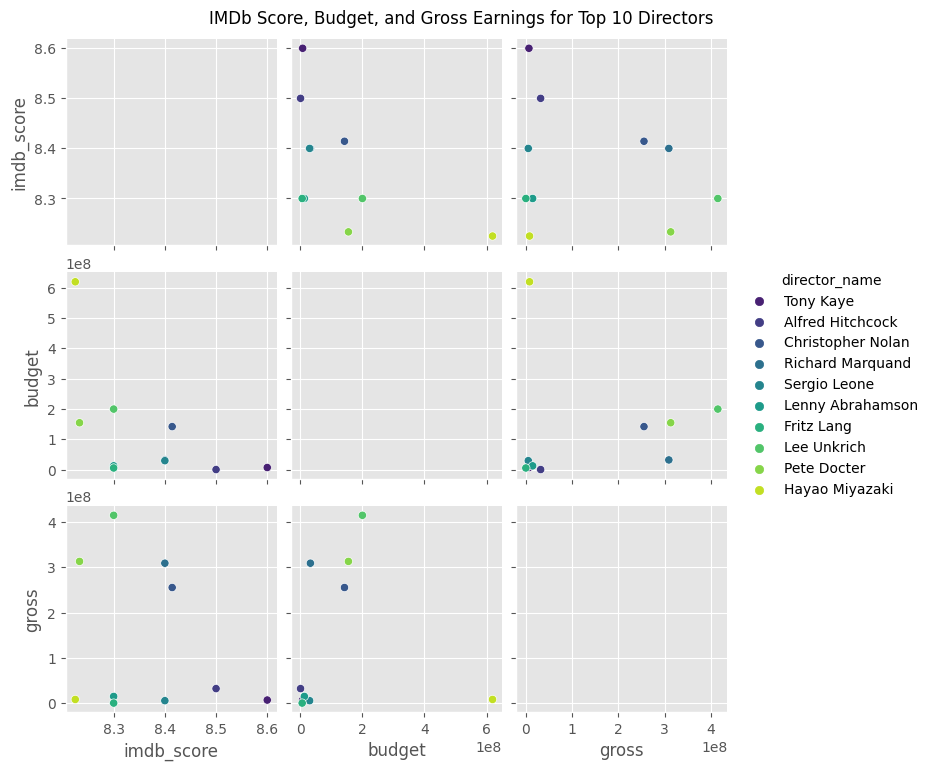

In [ ]:
director_avg_stats = df.groupby('director_name').agg({
    'imdb_score': 'mean',
    'budget': 'mean',
    'gross': 'mean'
}).reset_index()

director_avg_stats = director_avg_stats.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_stats.head(10)

sns.pairplot(top_10_directors[['imdb_score', 'budget', 'gross', 'director_name']], hue='director_name', palette='viridis')
plt.suptitle('IMDb Score, Budget, and Gross Earnings for Top 10 Directors', y=1.02)
plt.show()

Hypothesis testing to find the co relation between budget-gross, gross-imdb score and budget-imdb score.

In [ ]:
from scipy.stats import pearsonr
director_avg_stats = df.groupby('director_name').agg({
    'imdb_score': 'mean',
    'budget': 'mean',
    'gross': 'mean'
}).reset_index()

director_avg_stats = director_avg_stats.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_stats.head(10)

correlation_imdb_budget, p_value_imdb_budget = pearsonr(top_10_directors['imdb_score'], top_10_directors['budget'])
print(f"\nHypothesis Testing for IMDb Score and Budget:")
print(f"Pearson correlation coefficient: {correlation_imdb_budget}")
print(f"P-value: {p_value_imdb_budget}")

correlation_imdb_gross, p_value_imdb_gross = pearsonr(top_10_directors['imdb_score'], top_10_directors['gross'])
print(f"\nHypothesis Testing for IMDb Score and Gross Earnings:")
print(f"Pearson correlation coefficient: {correlation_imdb_gross}")
print(f"P-value: {p_value_imdb_gross}")

correlation_budget_gross, p_value_budget_gross = pearsonr(top_10_directors['budget'], top_10_directors['gross'])
print(f"\nHypothesis Testing for Budget and Gross Earnings:")
print(f"Pearson correlation coefficient: {correlation_budget_gross}")
print(f"P-value: {p_value_budget_gross}")


Hypothesis Testing for IMDb Score and Budget:
Pearson correlation coefficient: -0.5547300902306858
P-value: 0.09604989670255575

Hypothesis Testing for IMDb Score and Gross Earnings:
Pearson correlation coefficient: -0.24650445886210687
P-value: 0.492360099996601

Hypothesis Testing for Budget and Gross Earnings:
Pearson correlation coefficient: 0.06819900730766845
P-value: 0.8515066138505698


To find the statistical significant correlation between IMDB scores and budgets.

In [ ]:
director_avg_stats = df.groupby('director_name').agg({
    'imdb_score': 'mean',
    'budget': 'mean',
    'gross': 'mean'
}).reset_index()

director_avg_stats = director_avg_stats.sort_values(by='imdb_score', ascending=False)

top_10_directors = director_avg_stats.head(10)

correlation_imdb_budget, p_value_imdb_budget = pearsonr(top_10_directors['imdb_score'], top_10_directors['budget'])
print("\nHypothesis Testing for IMDb Score and Budget:")
print(f"Pearson correlation coefficient: {correlation_imdb_budget}")
print(f"P-value: {p_value_imdb_budget}")

alpha = 0.05
if p_value_imdb_budget < alpha:
    print("Reject the null hypothesis: There is a statistically significant correlation between IMDb scores and budgets.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant correlation between IMDb scores and budgets.")



Hypothesis Testing for IMDb Score and Budget:
Pearson correlation coefficient: -0.5547300902306858
P-value: 0.09604989670255575
Fail to reject the null hypothesis: There is no statistically significant correlation between IMDb scores and budgets.


Relation exclusively between gross and imdb score.

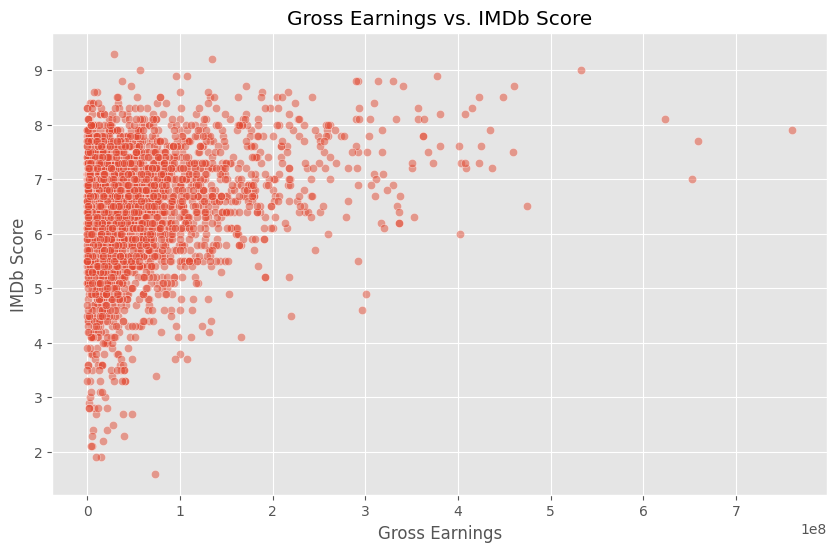


Pearson correlation coefficient: 0.27201825443970185
P-value: 7.061272969375982e-52

Reject the null hypothesis: There is a statistically significant correlation.


In [ ]:
df = df.dropna(subset=['gross', 'imdb_score'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross', y='imdb_score', data=df, alpha=0.5)
plt.title('Gross Earnings vs. IMDb Score')
plt.xlabel('Gross Earnings')
plt.ylabel('IMDb Score')
plt.show()

correlation, p_value = pearsonr(df['gross'], df['imdb_score'])
print(f"\nPearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a statistically significant correlation.")
else:
    print("\nFail to reject the null hypothesis: There is no statistically significant correlation.")

Fom above, we can conclude that ther is statistical correlation between gross earnings and imdb scores.

 Top 10 genres compared to IMDB scores

<ipython-input-424-ce249a1da1d2>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='average_imdb_score', y=top_10_genres.index, data=top_10_genres, ci=None, palette='viridis')


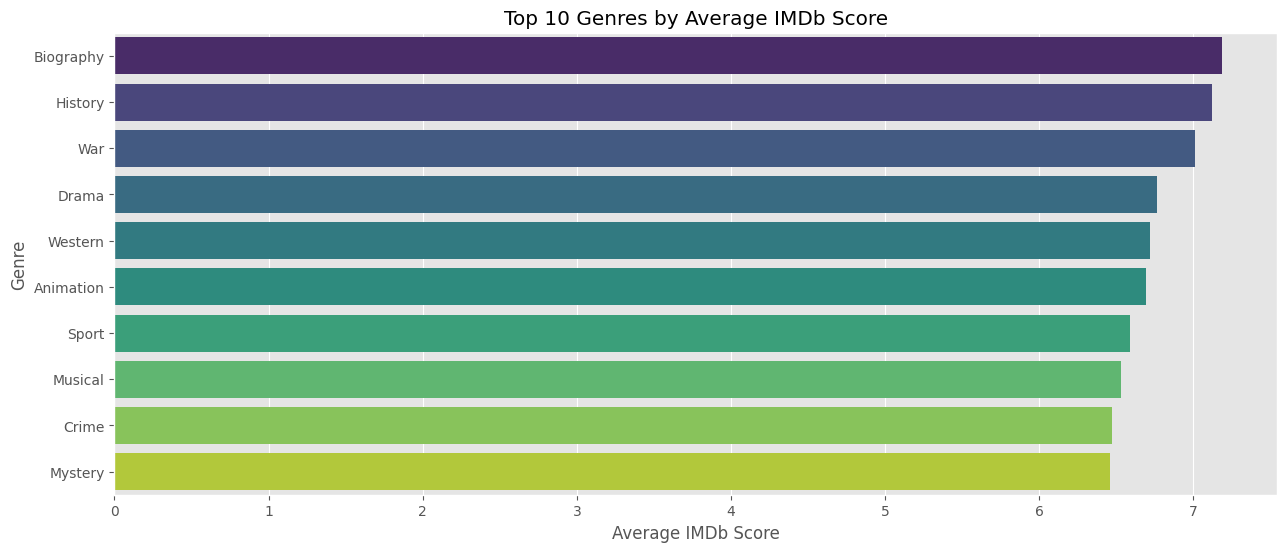

In [ ]:
unique_genres = df['genres'].str.split('|', expand=True).stack().unique()

genre_avg_scores = pd.DataFrame(index=unique_genres, columns=['average_imdb_score'])

for genre in unique_genres:
    mask = df['genres'].str.contains(genre, na=False)
    genre_avg_scores.loc[genre, 'average_imdb_score'] = df.loc[mask, 'imdb_score'].mean()

genre_avg_scores = genre_avg_scores.sort_values(by='average_imdb_score', ascending=False)

top_10_genres = genre_avg_scores.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x='average_imdb_score', y=top_10_genres.index, data=top_10_genres, ci=None, palette='viridis')
plt.title('Top 10 Genres by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.show()

Heat map relations between all the facebook likes affecting imdb score.

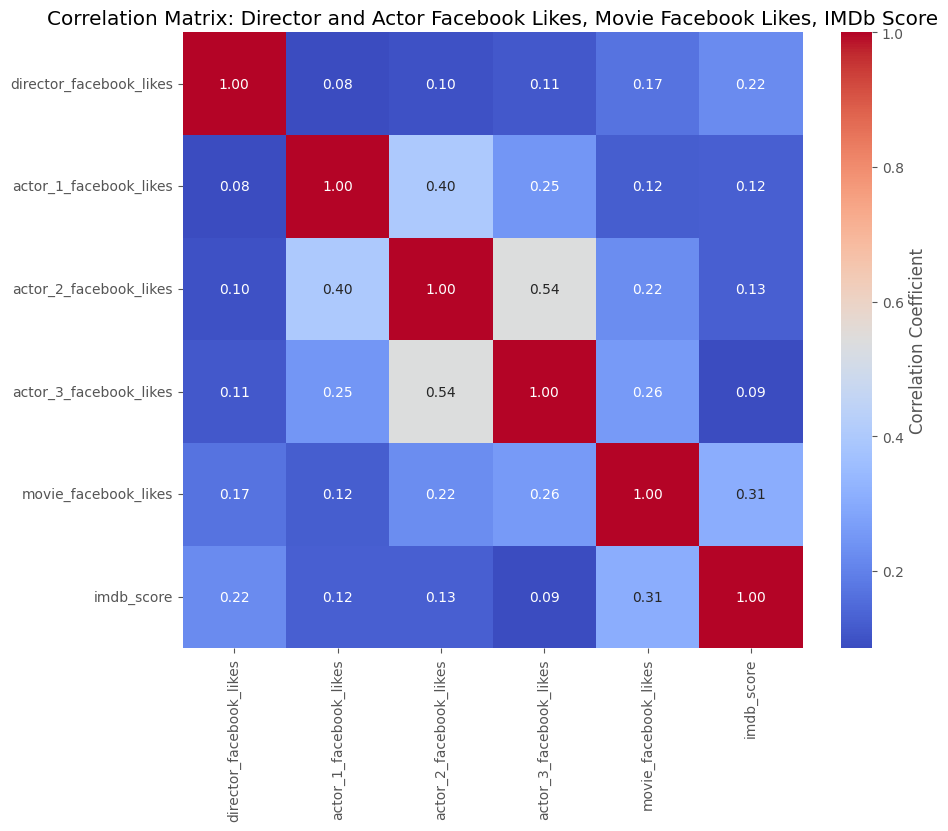

In [ ]:
selected_columns = ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                     'actor_3_facebook_likes', 'movie_facebook_likes', 'imdb_score']

df_selected = df[selected_columns].dropna()

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Director and Actor Facebook Likes, Movie Facebook Likes, IMDb Score')
plt.show()

Hypothesis testing of all these variable individually with imdb score.

In [ ]:
selected_columns = ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                     'actor_3_facebook_likes', 'movie_facebook_likes', 'imdb_score']

df_selected = df[selected_columns].dropna()

correlation_matrix = df_selected.corr()


alpha = 0.05
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        if col1 != col2:
            correlation_coefficient, p_value = pearsonr(df_selected[col1], df_selected[col2])
            print(f"\nHypothesis Testing for {col1} and {col2}:")
            print(f"Pearson correlation coefficient: {correlation_coefficient}")
            print(f"P-value: {p_value}")

            if p_value < alpha:
                print("Reject the null hypothesis: There is a statistically significant correlation.")
            else:
                print("Fail to reject the null hypothesis: There is no statistically significant correlation.")


Hypothesis Testing for director_facebook_likes and actor_1_facebook_likes:
Pearson correlation coefficient: 0.08490735254939875
P-value: 3.331186511326558e-06
Reject the null hypothesis: There is a statistically significant correlation.

Hypothesis Testing for director_facebook_likes and actor_2_facebook_likes:
Pearson correlation coefficient: 0.09801989678200888
P-value: 7.851392730912236e-08
Reject the null hypothesis: There is a statistically significant correlation.

Hypothesis Testing for director_facebook_likes and actor_3_facebook_likes:
Pearson correlation coefficient: 0.11335577870379628
P-value: 5.104854683353919e-10
Reject the null hypothesis: There is a statistically significant correlation.

Hypothesis Testing for director_facebook_likes and movie_facebook_likes:
Pearson correlation coefficient: 0.16718691224183807
P-value: 3.482548930755765e-20
Reject the null hypothesis: There is a statistically significant correlation.

Hypothesis Testing for director_facebook_likes an

From above, we can conclude that facebook likes are to be given importance.

Plotting all the relations.

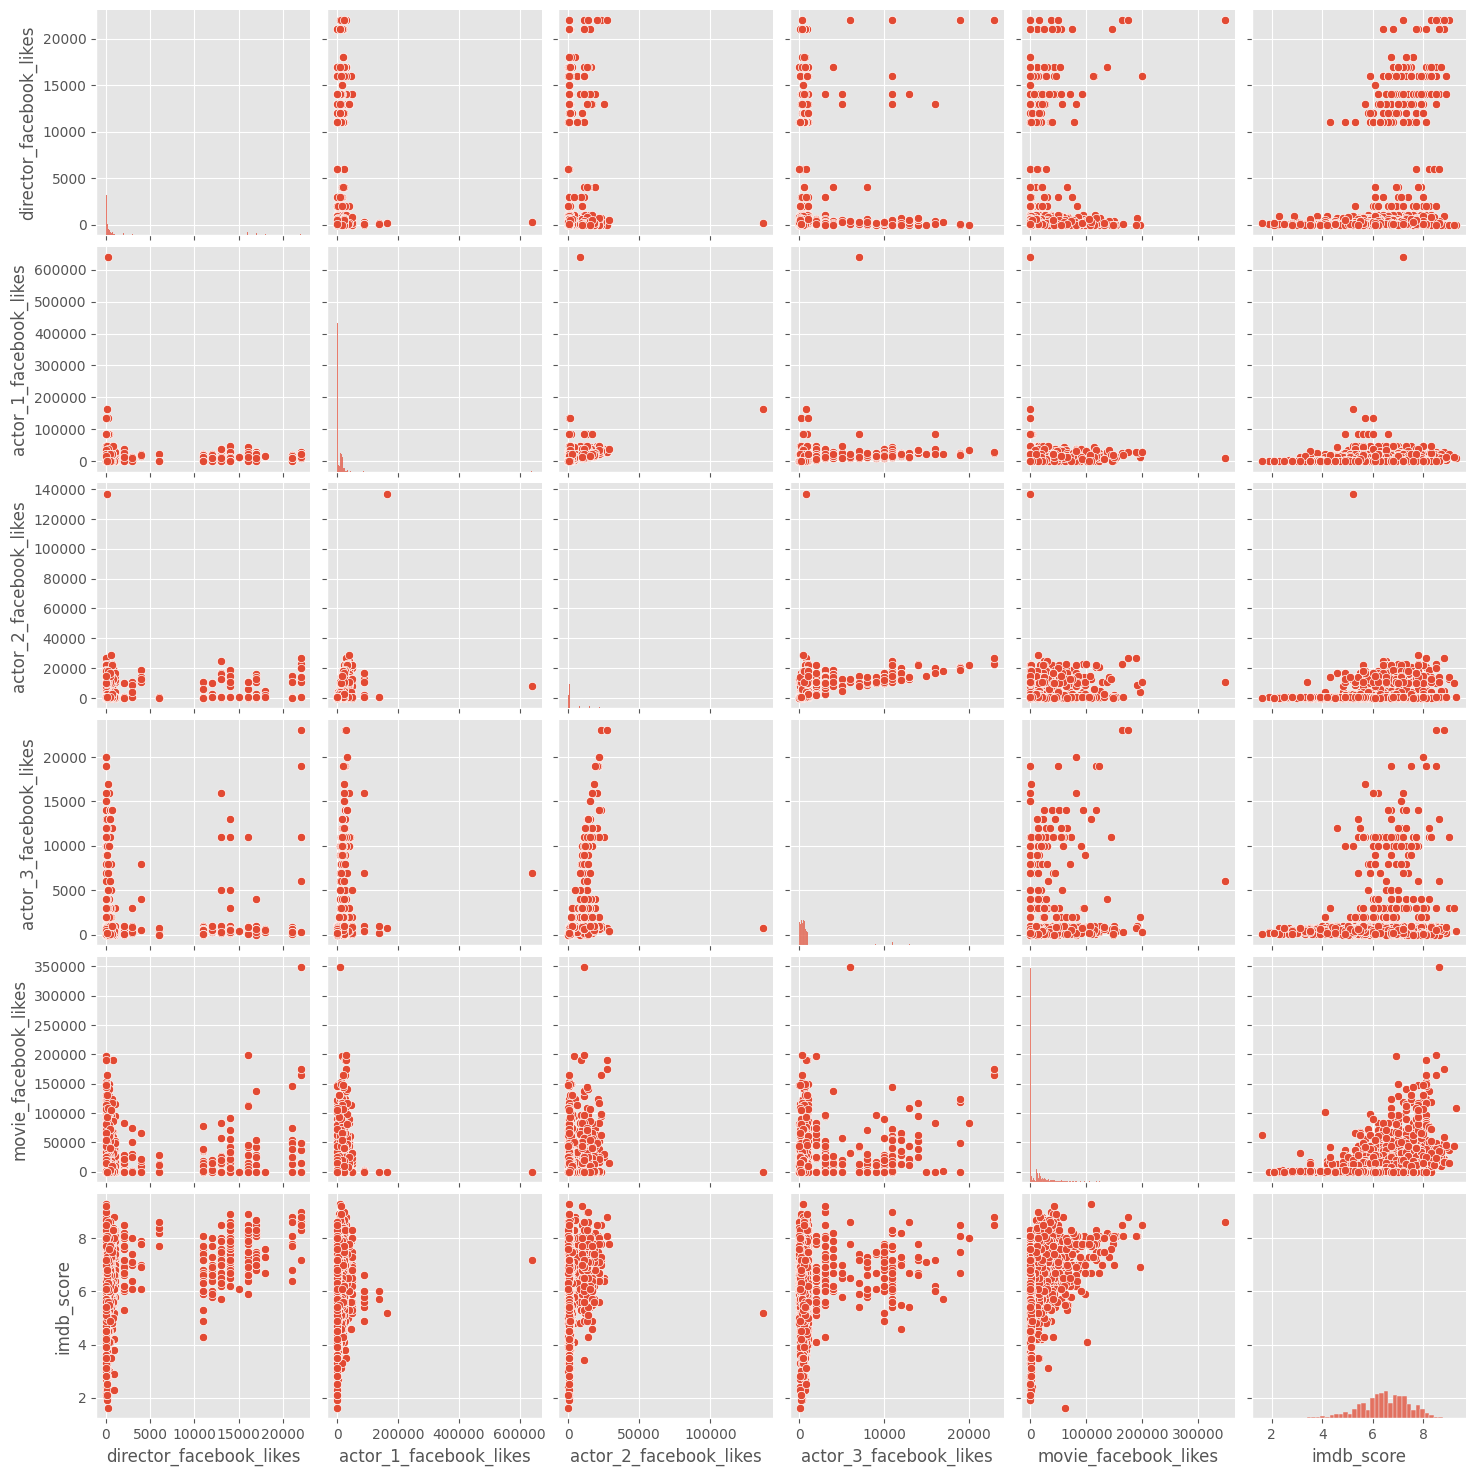

In [ ]:
selected_columns = ['director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                     'actor_3_facebook_likes', 'movie_facebook_likes', 'imdb_score']

df_selected = df[selected_columns].dropna()

sns.pairplot(df_selected)
plt.show()

Relation between cast total facebook likes exclusivly with imdb score.

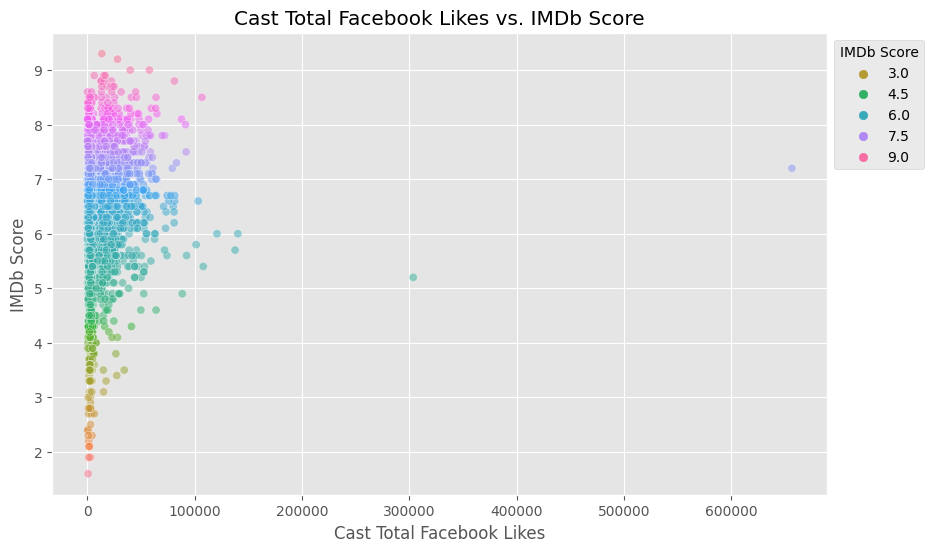


Pearson correlation coefficient: 0.14272750119954913
P-value: 4.4562430048488734e-15

Reject the null hypothesis: There is a statistically significant correlation.


In [ ]:
df = df.dropna(subset=['cast_total_facebook_likes', 'imdb_score'])

custom_colors = sns.color_palette("husl", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cast_total_facebook_likes', y='imdb_score', data=df, alpha=0.5, hue='imdb_score', palette=custom_colors)
plt.title('Cast Total Facebook Likes vs. IMDb Score')
plt.xlabel('Cast Total Facebook Likes')
plt.ylabel('IMDb Score')
plt.legend(title='IMDb Score', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

correlation, p_value = pearsonr(df['cast_total_facebook_likes'], df['imdb_score'])
print(f"\nPearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a statistically significant correlation.")
else:
    print("\nFail to reject the null hypothesis: There is no statistically significant correlation.")

Again, we can conclude that its important.

Figuring out which language is the best option.

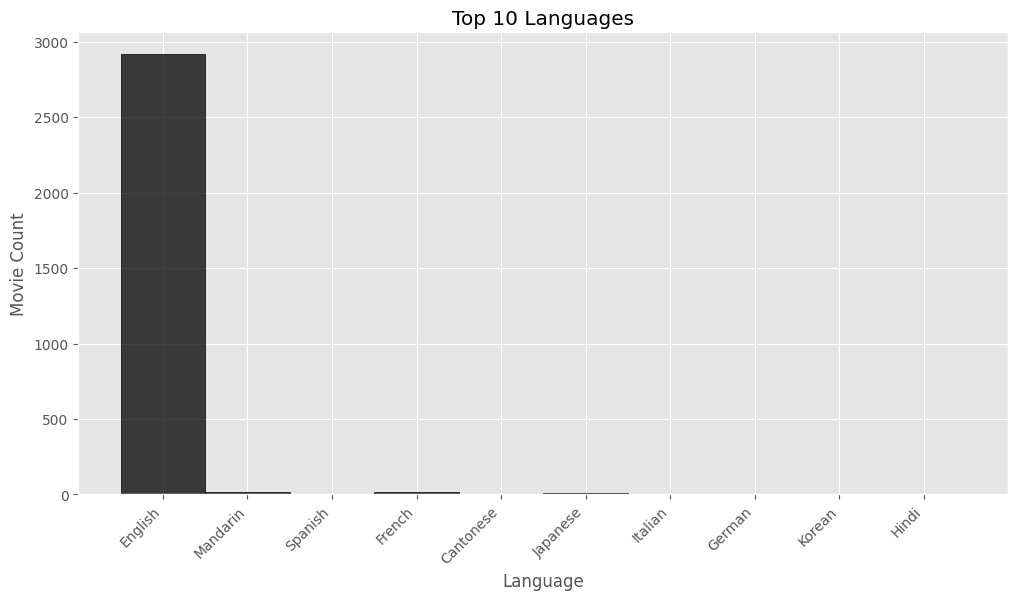

In [ ]:
df = df.dropna(subset=['language'])

top_10_languages = df['language'].value_counts().head(10).index

df_top_10_languages = df[df['language'].isin(top_10_languages)]

plt.figure(figsize=(12, 6))
sns.histplot(x='language', data=df_top_10_languages, bins=len(top_10_languages), color='black', edgecolor='black')
plt.title('Top 10 Languages')
plt.xlabel('Language')
plt.ylabel('Movie Count')
plt.xticks(rotation=45, ha='right')
plt.show()

It is clearly English.

Now figuring out which country has the best imdb scores.

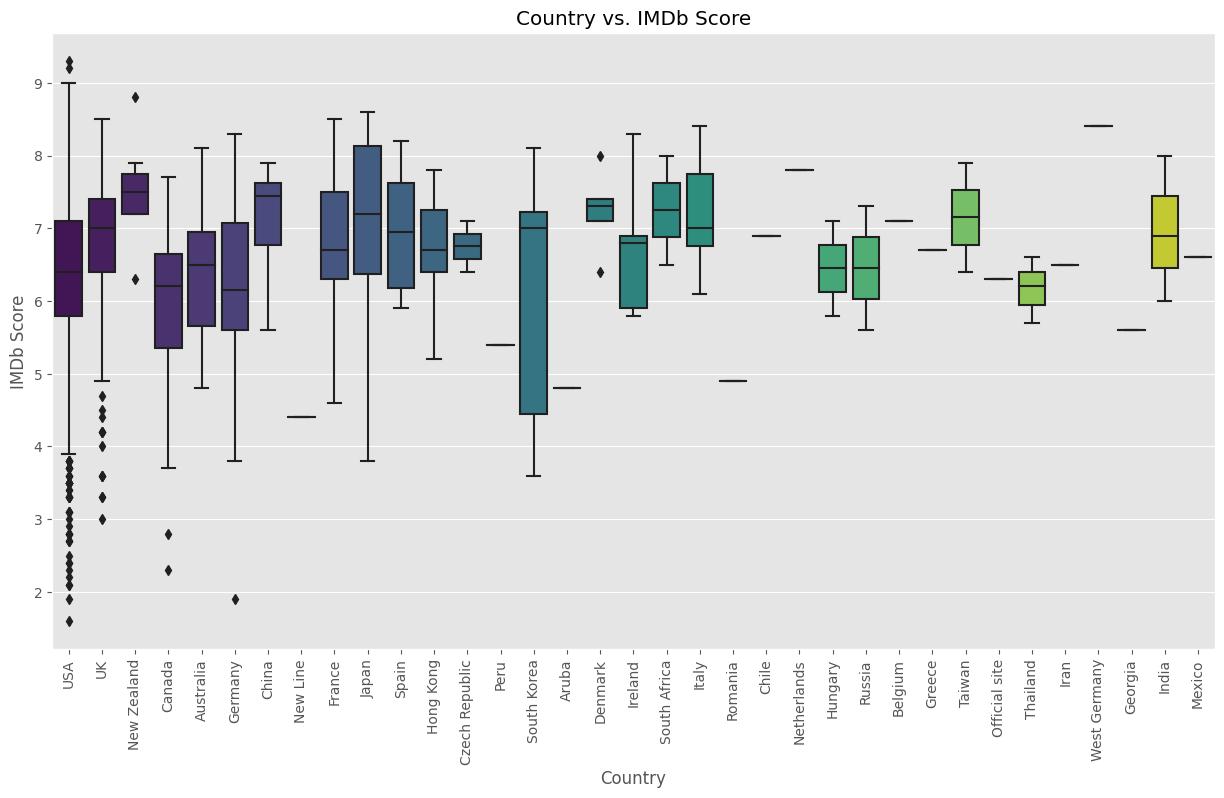

In [ ]:
df = df.dropna(subset=['country', 'imdb_score'])

plt.figure(figsize=(15, 8))
sns.boxplot(x='country', y='imdb_score', data=df, palette='viridis')
plt.title('Country vs. IMDb Score')
plt.xlabel('Country')
plt.ylabel('IMDb Score')
plt.xticks(rotation=90)
plt.show()



So, we primarily consider USA and UK.

Taking an example of a successful director from the above analysis

Checking their imdb scores.

In [ ]:
director_name = 'Christopher Nolan'

movies_by_director = df[df['director_name'] == director_name]

imdb_ratings = movies_by_director[['movie_title', 'imdb_score']]

print(f"\nIMDb Ratings for movies directed by {director_name}:\n{imdb_ratings}")


IMDb Ratings for movies directed by Christopher Nolan:
                 movie_title  imdb_score
3     The Dark Knight Rises          8.5
66          The Dark Knight          9.0
96             Interstellar          8.6
97                Inception          8.8
120           Batman Begins          8.3
1066               Insomnia          7.2
1233           The Prestige          8.5


Average IMDB score of Christopher Nolan.

In [ ]:
imdb_ratings = movies_by_director[['movie_title', 'imdb_score']]

average_imdb_rating = imdb_ratings['imdb_score'].mean()
average_imdb_rating

8.414285714285715

In [ ]:
director_name = 'Christopher Nolan'

movies_by_director = df[df['director_name'] == director_name]

gross = movies_by_director[['movie_title', 'gross']]

print(f"\n Gross for movies directed by {director_name}:\n{gross}")


 Gross for movies directed by Christopher Nolan:
                 movie_title        gross
3     The Dark Knight Rises   448130642.0
66          The Dark Knight   533316061.0
96             Interstellar   187991439.0
97                Inception   292568851.0
120           Batman Begins   205343774.0
1066               Insomnia    67263182.0
1233           The Prestige    53082743.0


In [ ]:
average_gross = gross['gross'].mean()
average_gross

255385241.7142857

In [ ]:
director_name = 'Christopher Nolan'

movies_by_director = df[df['director_name'] == director_name]

budget = movies_by_director[['movie_title', 'budget']]

print(f"\n Budget for movies directed by {director_name}:\n{budget}")


 Budget for movies directed by Christopher Nolan:
                 movie_title       budget
3     The Dark Knight Rises   250000000.0
66          The Dark Knight   185000000.0
96             Interstellar   165000000.0
97                Inception   160000000.0
120           Batman Begins   150000000.0
1066               Insomnia    46000000.0
1233           The Prestige    40000000.0


In [ ]:
average_budget = budget['budget'].mean()
average_budget

142285714.2857143

In [ ]:
given_budget = 1500000

average_budget = 142285714

budget_difference = given_budget - average_budget

print(f"Difference between {given_budget} and average budget ({average_budget}): {budget_difference}")

Difference between 1500000 and average budget (142285714): -140785714


After getting the required results of Christopher Nolan's work, we can say that his movies are top tier, yet we can not afford him as his average budget of a movie is way higher than we have.

In [ ]:
director_mean_budgets = df.groupby('director_name')['budget'].mean()

threshold_budget = 1500000

selected_directors = director_mean_budgets[director_mean_budgets <= threshold_budget]

print(f"\nList of Directors with Mean Budgets less than or equal to {threshold_budget}:\n{selected_directors}")


List of Directors with Mean Budgets less than or equal to 1500000:
director_name
Alfred Hitchcock    806947.0
Name: budget, dtype: float64


Working with the budget we have.

In [ ]:
budget_threshold = 1500000
imdb_score_threshold = 7

selected_movies = df[(df['budget'] < budget_threshold) & (df['imdb_score'] > imdb_score_threshold)]

print(f"\nList of Movies with Budget < {budget_threshold} and IMDb Score > {imdb_score_threshold}:\n")
print(selected_movies[['movie_title', 'budget', 'imdb_score']])


List of Movies with Budget < 1500000 and IMDb Score > 7:

                        movie_title    budget  imdb_score
1281                  Mean Streets   500000.0         7.4
2242                        Psycho   806947.0         8.5
2492                     Halloween   300000.0         7.9
3278  The Texas Chain Saw Massacre    83532.0         7.5


List of directors who worked with similar budget to ours.

In [ ]:

directors_of_selected_movies = selected_movies['director_name'].tolist()

print(f"\nDirectors of the selected movies:\n")
directors_of_selected_movies


Directors of the selected movies:



['Martin Scorsese', 'Alfred Hitchcock', 'John Carpenter', 'Tobe Hooper']

Average IMDB scores of these 4 directors to see which one is the best.

In [ ]:
director_name1 = 'Martin Scorsese'

movies_by_director = df[df['director_name'] == director_name1]

movies_by_director = movies_by_director.dropna(subset=['imdb_score'])

mean_imdb_score = movies_by_director['imdb_score'].mean()

if not pd.isnull(mean_imdb_score):
    print(f"\nMean IMDb Score for movies directed by {director_name}: {mean_imdb_score:.2f}")
else:
    print(f"\nNo available data for mean IMDb score for movies directed by {director_name1}.")


Mean IMDb Score for movies directed by Christopher Nolan: 7.68


In [ ]:
director_name2 = 'Alfred Hitchcock'

movies_by_director = df[df['director_name'] == director_name2]

movies_by_director = movies_by_director.dropna(subset=['imdb_score'])

mean_imdb_score = movies_by_director['imdb_score'].mean()

if not pd.isnull(mean_imdb_score):
    print(f"\nMean IMDb Score for movies directed by {director_name2}: {mean_imdb_score:.2f}")
else:
    print(f"\nNo available data for mean IMDb score for movies directed by {director_name2}.")


Mean IMDb Score for movies directed by Alfred Hitchcock: 8.50


In [ ]:
director_name3 = 'John Carpenter'

movies_by_director = df[df['director_name'] == director_name3]

movies_by_director = movies_by_director.dropna(subset=['imdb_score'])


mean_imdb_score = movies_by_director['imdb_score'].mean()

if not pd.isnull(mean_imdb_score):
    print(f"\nMean IMDb Score for movies directed by {director_name3}: {mean_imdb_score:.2f}")
else:
    print(f"\nNo available data for mean IMDb score for movies directed by {director_name3}.")


Mean IMDb Score for movies directed by John Carpenter: 6.60


In [ ]:
director_name4 = 'Tobe Hooper'

movies_by_director = df[df['director_name'] == director_name4]

movies_by_director = movies_by_director.dropna(subset=['imdb_score'])

mean_imdb_score = movies_by_director['imdb_score'].mean()

if not pd.isnull(mean_imdb_score):
    print(f"\nMean IMDb Score for movies directed by {director_name4}: {mean_imdb_score:.2f}")
else:
    print(f"\nNo available data for mean IMDb score for movies directed by {director_name4}.")


Mean IMDb Score for movies directed by Tobe Hooper: 6.95


Number of movies made by these directors.

In [ ]:
director_name2

movies_by_director = df[df['director_name'] == director_name2]

num_movies = len(movies_by_director)

print(f"\nNumber of movies directed by {director_name2}: {num_movies}")


Number of movies directed by Alfred Hitchcock: 1


In [ ]:
director_name1

movies_by_director = df[df['director_name'] == director_name1]

num_movies = len(movies_by_director)

print(f"\nNumber of movies directed by {director_name1}: {num_movies}")


Number of movies directed by Martin Scorsese: 15


From the above information we can conclude that Martin Scorsese has done impressive work so far and we can have him as our top potential.

Now checking if Martin can get sufficient gross we need by checking his statistical correlated factors.

In [ ]:
director_name = 'Martin Scorsese'

movies_by_director = df[df['director_name'] == director_name]

total_director_likes = movies_by_director['director_facebook_likes'].sum()

print(f"\nTotal Director Facebook Likes for movies directed by {director_name}: {total_director_likes}")


Total Director Facebook Likes for movies directed by Martin Scorsese: 255000.0


In [ ]:
mean_director_likes = df['director_facebook_likes'].mean()

print(f"\nMean Director Facebook Likes for all directors: {mean_director_likes}")


Mean Director Facebook Likes for all directors: 908.4535117056856


In [ ]:
total_director_likes > mean_director_likes

True

Figuring out which genre movie are made most by Martin.

In [ ]:
director_name = 'Martin Scorsese'
movies_by_director = df[df['director_name'] == director_name]

genres_list = movies_by_director['genres'].str.split('|').explode()


genre_counts = genres_list.value_counts()

print(f"\nTop Genres for movies directed by {director_name}:\n")
print(genre_counts.head())


Top Genres for movies directed by Martin Scorsese:

Drama        13
Crime         7
Biography     6
Thriller      5
Mystery       2
Name: genres, dtype: int64


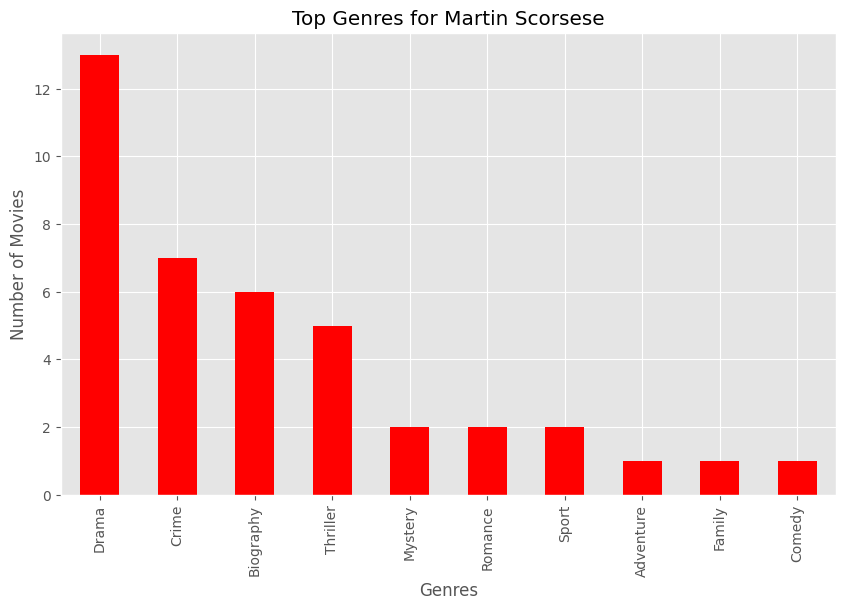

In [ ]:
top_genres_plot = genre_counts.head(10).plot(kind='bar', figsize=(10, 6), color='red')
top_genres_plot.set_title(f'Top Genres for {director_name}')
top_genres_plot.set_xlabel('Genres')
top_genres_plot.set_ylabel('Number of Movies')
plt.show()

Finding out the common plot keywords involved in Martin's movies.

In [ ]:
director_name = 'Martin Scorsese'

movies_by_director = df[df['director_name'] == director_name]

keywords_list = movies_by_director['plot_keywords'].str.split('|').explode()

keyword_counts = keywords_list.value_counts()

print(f"\nTop Plot Keywords for movies directed by {director_name}:\n")
print(keyword_counts.head())




Top Plot Keywords for movies directed by Martin Scorsese:

gangster     2
lawyer       2
automaton    1
love         1
rescue       1
Name: plot_keywords, dtype: int64


Relational graph of the keywords.

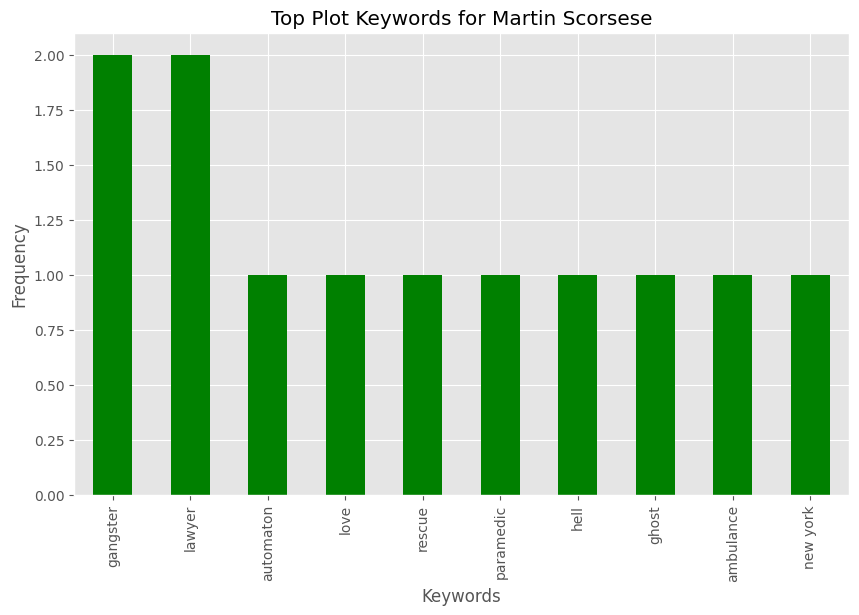

In [ ]:
top_keywords_plot = keyword_counts.head(10).plot(kind='bar', figsize=(10, 6), color='green')
top_keywords_plot.set_title(f'Top Plot Keywords for {director_name}')
top_keywords_plot.set_xlabel('Keywords')
top_keywords_plot.set_ylabel('Frequency')
plt.show()

Making sure if all his movies are made in English or not.

In [ ]:
director_name = 'Martin Scorsese'
movies_by_director = df[df['director_name'] == director_name]

language_counts = movies_by_director['language'].value_counts()

print(f"\nLanguage Distribution for movies directed by {director_name}:\n")
print(language_counts)



Language Distribution for movies directed by Martin Scorsese:

English    15
Name: language, dtype: int64


Getting to know the mean duration of Martin's movies.

In [ ]:
director_name = 'Martin Scorsese'

movies_by_director = df[df['director_name'] == director_name]

movies_by_director = movies_by_director.dropna(subset=['duration'])

mean_duration = movies_by_director['duration'].mean()

if not pd.isnull(mean_duration):
    print(f"\nMean Duration for movies directed by {director_name}: {mean_duration:.2f} minutes")
else:
    print(f"\nNo available data for mean duration for movies directed by {director_name}.")



Mean Duration for movies directed by Martin Scorsese: 149.27 minutes




---

---





**CONCLUSION AND SUMMARY**

After examining the IMDB data, I have come up with necessary conclusions and solutions to help Sussex Budget Productions produce a film with a budget of 1.5 Million GBP and ensure a great return so that the company stays in the business.

Talking from the statistics, I would recommend to consider Martin Scorsese as the director for the next movie.

He happened to work and produce with significantly low budget for majority of his movies unlike other elite directors.

His has directed 15 movies in his career with an impressive average IMDB rating of all his movies. As country is concerned, he is from the USA. He only makes movies in English.

Talking from the facts, he has directed most movies with the genre drama and next to drama is crime.
Since Drama obviously has a lot of demand in the movie industry, why not consider it as our pririoty genre.

Next up is drama involving what ? The best options are gangster and advocate, and if not both, biography. We all know people love gangster movies. Hence, we should consider that.

He definetely has good casting skill, based on the facebook likes of his actors.

It is better to keep the movie duration to be a little more than 2 hours.



**In Short:**

              Director: Martin Scorses

              Genre: Drama

              Drama involving : A gangster

              Duration: 2 hours or more

              Language: English

              Country: USA

              Budget: 1500000 GBP





              







---



---



---



---


